In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import FixedLocator, FixedFormatter


In [2]:
# Lista de URLs de cada chunk
urls = [
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_1.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_2.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_3.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_4.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_5.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_6.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_7.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_8.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_9.html",
    "https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_10.html",
]

# Lista para almacenar cada DataFrame
dataframes = []

for url in urls:
    # Descargar el contenido de cada página
    response = requests.get(url)
    response.raise_for_status()  # Asegura que se descargó correctamente

    # Convertir el contenido HTML a un DataFrame
    tables = pd.read_html(response.text)

    # La tabla relevante suele ser la primera en estos archivos
    df = tables[0]
    dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
geih_raw = pd.concat(dataframes, ignore_index=True)

# Muestra de los datos
print(geih_raw.head())


<ipython-input-2-bb15946f1a06>:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)
<ipython-input-2-bb15946f1a06>:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)
<ipython-input-2-bb15946f1a06>:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)
<ipython-input-2-bb15946f1a06>:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)
<ipython-input-2-bb15946f1a0

   Unnamed: 0  directorio  secuencia_p  orden  clase dominio  mes  estrato1  \
0           1     4514331            1      2      1  BOGOTA    1         2   
1           2     4514331            1      1      1  BOGOTA    1         2   
2           3     4514332            1      4      1  BOGOTA    1         2   
3           4     4514332            1      3      1  BOGOTA    1         2   
4           5     4514332            1      1      1  BOGOTA    1         2   

   sex  age  ...  y_viaticos_m  y_accidentes_m  y_salarySec_m  y_ingLab_m_ha  \
0    0   29  ...           NaN             NaN            NaN            NaN   
1    1   36  ...           NaN             NaN            NaN    8404.320312   
2    1    4  ...           NaN             NaN            NaN            NaN   
3    1    7  ...           NaN             NaN            NaN            NaN   
4    0   32  ...           NaN             NaN            NaN            NaN   

   y_gananciaNeta_m  y_gananciaNetaAgro_m  y

In [3]:
geih_raw #32177 rows × 178 columns

,Unnamed: 0,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
0,1,4514331,1,2,1,BOGOTA,1,2,0,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4514331,1,1,1,BOGOTA,1,2,1,36,...,NaN,NaN,NaN,8404.320312,NaN,NaN,NaN,NaN,1.620833e+06,8404.320312
2,3,4514332,1,4,1,BOGOTA,1,2,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4514332,1,3,1,BOGOTA,1,2,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4514332,1,1,1,BOGOTA,1,2,0,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32172,3213,4804454,1,2,1,BOGOTA,12,2,0,24,...,NaN,NaN,NaN,3345.555664,NaN,NaN,NaN,NaN,1.003667e+06,3345.555664
32173,3214,4804455,1,1,1,BOGOTA,12,3,0,36,...,500000.0,NaN,NaN,25958.333984,NaN,NaN,NaN,NaN,6.675000e+06,25958.333984
32174,3215,4804455,1,2,1,BOGOTA,12,3,1,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32175,3216,4804455,1,3,1,BOGOTA,12,3,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Exporto el df a un csv así lo podemos cargar directamente y no scrappear cada vez que queremos usarlo
geih_raw.to_csv("C:\\Users\\Sofia\\OneDrive\\Escritorio\\ML\\PS 1\\geih_data.csv", index=False)

In [5]:
# Elimino la primera columna que corresponde al índice de la página web
geih = geih_raw.drop("Unnamed: 0", axis=1)
geih.shape #(32177, 177)


(32177, 177)

In [6]:
# Filtro las observaciones donde la columna 'age' es mayor a 17
geih = geih[geih['age'] > 17]

geih.shape #(16277, 177)

(24568, 177)

In [7]:
# ocu	=1 occupied; =0 otherwise
# Filtro las observaciones donde la columna 'ocu' es igual a 1
geih = geih[geih['ocu'] == 1]

geih.shape #(16542, 177)

(16542, 177)

In [8]:
# Filtro las observaciones donde 'y_total_m_ha' es mayor a 0 y no tiene valores missing
geih = geih[(geih['y_total_m_ha'] > 0) & (geih['y_total_m_ha'].notna())]
geih.shape #(16277, 177)

(14764, 177)

In [9]:
geih.describe()

,directorio,secuencia_p,orden,clase,mes,estrato1,sex,age,p6050,p6090,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
count,1.476400e+04,14764.000000,14764.000000,14764.0,14764.000000,14764.000000,14764.000000,14764.000000,14764.000000,14764.000000,...,3.700000e+02,3.500000e+01,4.460000e+02,9892.000000,4.872000e+03,0.0,4.872000e+03,4872.000000,1.476400e+04,14764.000000
mean,4.657875e+06,1.014901,1.917096,1.0,6.497291,2.521336,0.526619,38.888174,2.201775,1.086359,...,3.236297e+06,4.471214e+05,6.954736e+05,8822.229341,1.357935e+06,NaN,1.357935e+06,8102.233746,1.617551e+06,8541.874328
std,8.169420e+04,0.136414,1.219258,0.0,3.362121,0.987021,0.499308,13.197838,1.799394,0.318851,...,1.058623e+07,7.379406e+05,1.135440e+06,12886.160570,2.466901e+06,NaN,2.466901e+06,15832.598917,2.431319e+06,13866.133412
min,4.514331e+06,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,18.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,6.000000e+03,326.666656,8.400000e+01,NaN,8.400000e+01,0.471528,8.400000e+01,0.471528
25%,4.588558e+06,1.000000,1.000000,1.0,4.000000,2.000000,0.000000,28.000000,1.000000,1.000000,...,1.325000e+05,0.000000e+00,1.200000e+05,4226.507812,5.000000e+05,NaN,5.000000e+05,2649.013733,8.000000e+05,3796.527832
50%,4.655331e+06,1.000000,2.000000,1.0,6.000000,2.000000,1.000000,37.000000,2.000000,1.000000,...,7.000000e+05,7.000000e+04,3.000000e+05,5055.555664,8.000000e+05,NaN,8.000000e+05,4148.147949,9.927447e+05,4837.486816
75%,4.728991e+06,1.000000,2.000000,1.0,9.000000,3.000000,1.000000,49.000000,3.000000,1.000000,...,2.000000e+06,5.950000e+05,7.000000e+05,8049.464600,1.500000e+06,NaN,1.500000e+06,7777.777832,1.554042e+06,7899.305664
max,4.804455e+06,4.000000,12.000000,1.0,12.000000,6.000000,1.000000,91.000000,9.000000,9.000000,...,1.300000e+08,3.125000e+06,1.000000e+07,350583.343750,7.000000e+07,NaN,7.000000e+07,340277.781250,7.000000e+07,350583.343750


In [10]:
nombres_columnas = sorted(geih.columns.tolist())
print(nombres_columnas)

['age', 'cclasnr11', 'cclasnr2', 'cclasnr3', 'cclasnr4', 'cclasnr5', 'cclasnr6', 'cclasnr7', 'cclasnr8', 'clase', 'college', 'cotPension', 'cuentaPropia', 'depto', 'directorio', 'dominio', 'dsi', 'estrato1', 'fex_c', 'fex_dpto', 'formal', 'fweight', 'hoursWorkActualSecondJob', 'hoursWorkUsual', 'ie', 'iees', 'imdi', 'imdies', 'impa', 'impaes', 'ina', 'inac', 'informal', 'ingtot', 'ingtotes', 'ingtotob', 'iof1', 'iof1es', 'iof2', 'iof2es', 'iof3h', 'iof3hes', 'iof3i', 'iof3ies', 'iof6', 'iof6es', 'isa', 'isaes', 'maxEducLevel', 'mes', 'microEmpresa', 'ocu', 'oficio', 'orden', 'p550', 'p6050', 'p6090', 'p6100', 'p6210', 'p6210s1', 'p6240', 'p6426', 'p6500', 'p6510', 'p6510s1', 'p6510s2', 'p6545', 'p6545s1', 'p6545s2', 'p6580', 'p6580s1', 'p6580s2', 'p6585s1', 'p6585s1a1', 'p6585s1a2', 'p6585s2', 'p6585s2a1', 'p6585s2a2', 'p6585s3', 'p6585s3a1', 'p6585s3a2', 'p6585s4', 'p6585s4a1', 'p6585s4a2', 'p6590', 'p6590s1', 'p6600', 'p6600s1', 'p6610', 'p6610s1', 'p6620', 'p6620s1', 'p6630s1', 'p66

In [11]:
geih_subset = geih[["y_total_m_ha", "age","clase", "sex", "cotPension", "hoursWorkUsual", "totalHoursWorked", "maxEducLevel", "microEmpresa", "sizeFirm", "p6426", "relab", "oficio", "fex_c"]]

In [12]:
#renombro a p6426 como "antig"
geih_subset = geih_subset.rename(columns={"p6426": "antig"})

In [13]:
geih_subset.describe()

,y_total_m_ha,age,clase,sex,cotPension,hoursWorkUsual,totalHoursWorked,maxEducLevel,microEmpresa,sizeFirm,antig,relab,oficio,fex_c
count,14764.000000,14764.000000,14764.0,14764.000000,14764.000000,14764.000000,14764.000000,14763.000000,14764.000000,14764.000000,14764.000000,14764.000000,14764.000000,14764.000000
mean,8541.874328,38.888174,1.0,0.526619,1.431997,47.197575,47.604850,5.947097,0.426443,3.213086,61.966269,2.140138,50.202113,249.707095
std,13866.133412,13.197838,0.0,0.499308,0.533173,15.055657,15.162947,1.208842,0.494576,1.652899,88.026480,1.455591,28.040123,60.238808
min,0.471528,18.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,106.612617
25%,3796.527832,28.000000,1.0,0.000000,1.000000,40.000000,40.000000,5.000000,0.000000,2.000000,7.000000,1.000000,33.000000,215.010351
50%,4837.486816,37.000000,1.0,1.000000,1.000000,48.000000,48.000000,6.000000,0.000000,4.000000,24.000000,1.000000,45.000000,240.747741
75%,7899.305664,49.000000,1.0,1.000000,2.000000,50.000000,50.000000,7.000000,1.000000,5.000000,72.000000,4.000000,74.000000,270.183529
max,350583.343750,91.000000,1.0,1.000000,3.000000,130.000000,130.000000,7.000000,1.000000,5.000000,720.000000,9.000000,99.000000,808.241452


In [14]:
geih_subset= geih_subset.drop("clase", axis=1) #es Bogotá entonces todas las observaciones son urbanas

In [15]:
sns.set_theme(style="whitegrid", palette="pastel")

<ipython-input-16-5ac79e293007>:2: UserWarning: The `weights` parameter has no effect with kind='scatter'.
  g = sns.relplot(


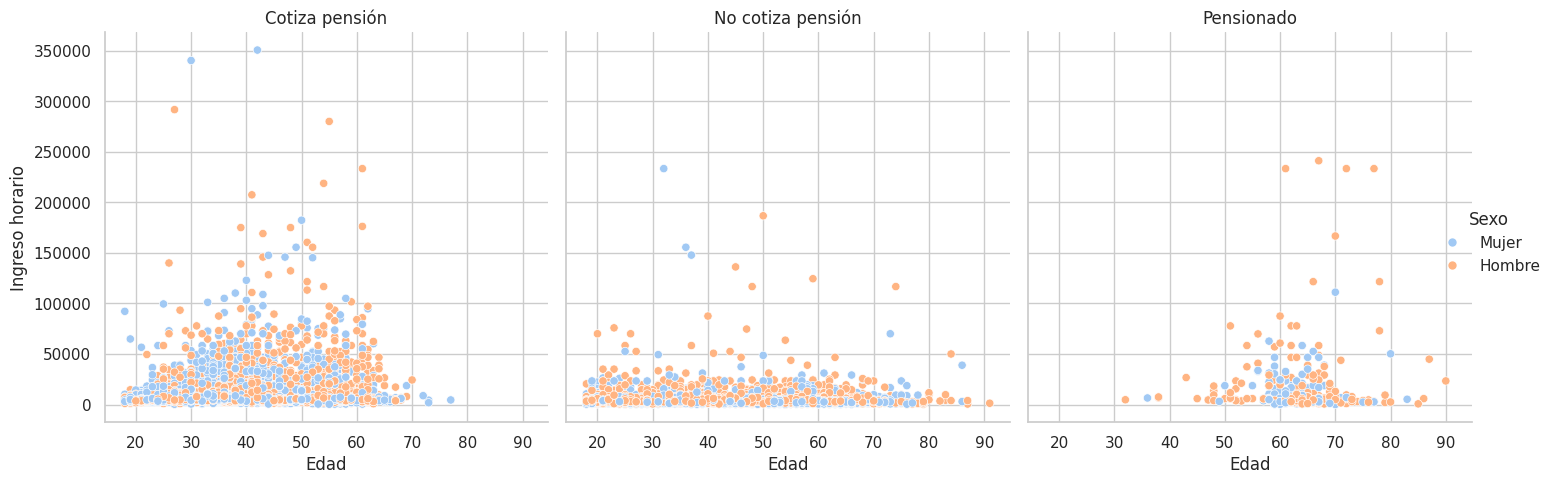

In [16]:
g = sns.relplot(
    data=geih_subset,
    x="age", y="y_total_m_ha",
    hue="sex", col="cotPension",
    weights = "fex_c",
    legend="full"
)

# Cambio las etiquetas de la leyenda para 'sex'
new_labels = ["Mujer", "Hombre"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g._legend.set_title("Sexo")

# Cambio el título del eje x a "Edad"
g.set_axis_labels("Edad", "Ingreso horario")

# Cambio los títulos de cada subgráfico basado en el valor de 'cotPension'
titulo_map = {1: "Cotiza pensión",
              2: "No cotiza pensión",
              3: "Pensionado"}
for ax, col_val in zip(g.axes.flat, geih_subset['cotPension'].unique()):
    ax.set_title(titulo_map[col_val])

plt.show()


In [17]:
# Me creo una variable que indica formal o informal de acuerdo a si cotiza o no pensión. Al sacar su media voy a saber qué porcentaje de la población es formal e informal
geih_subset["pension"] = geih_subset["cotPension"].apply(lambda x: 1 if x == 1 else (0 if x == 2 else np.nan))

In [18]:
# Transformo a logaritmo para graficar la densidad
geih_subset["log_y_total_m_ha"] = geih_subset["y_total_m_ha"].apply(lambda x: math.log(x))

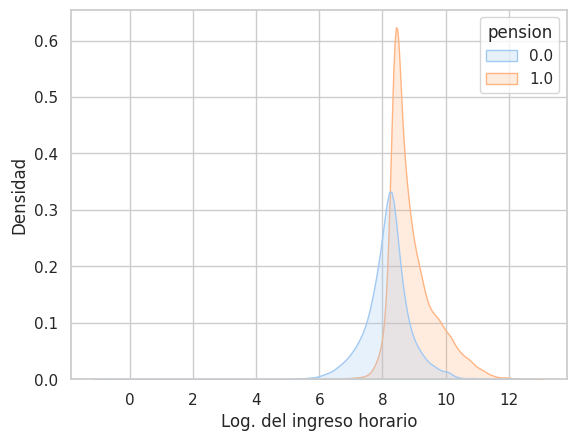

In [19]:
# DENSIDAD INGRESO X CONDICION
#MODIFICAR LEYENDAS

g = sns.kdeplot(
    data=geih_subset,
    x="log_y_total_m_ha",
    hue="pension",
    weights = "fex_c",
    fill=True,
    legend="full", common_norm=True
)

g.set_xlabel("Log. del ingreso horario") # Setteo label eje x
g.set_ylabel("Densidad") # Setteo label eje y
plt.show()


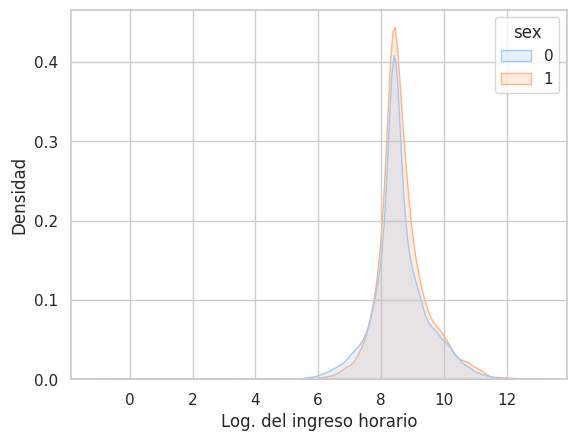

In [20]:
# DENSIDAD INGRESO POR SEXO
#MODIFICAR LEYENDAS

g = sns.kdeplot(
    data=geih_subset,
    x="log_y_total_m_ha",
    hue="sex",
    weights = "fex_c",
    fill=True,
    legend="full", common_norm=True
)

g.set_xlabel("Log. del ingreso horario") # Setteo label eje x
g.set_ylabel("Densidad") # Setteo label eje y
plt.show()


In [21]:
# ESTADÍSTICAS DESCRIPTIVAS

est_desc = geih_subset.describe().applymap(lambda x: round(x, 2))
est_desc
#lo veo como tabla interactiva y copio el contenido

<ipython-input-21-791152e2bfb1>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  est_desc = geih_subset.describe().applymap(lambda x: round(x, 2))


,y_total_m_ha,age,sex,cotPension,hoursWorkUsual,totalHoursWorked,maxEducLevel,microEmpresa,sizeFirm,antig,relab,oficio,fex_c,pension,log_y_total_m_ha
count,14764.00,14764.00,14764.00,14764.00,14764.00,14764.00,14763.00,14764.00,14764.00,14764.00,14764.00,14764.00,14764.00,14477.00,14764.00
mean,8541.87,38.89,0.53,1.43,47.20,47.60,5.95,0.43,3.21,61.97,2.14,50.20,249.71,0.60,8.62
std,13866.13,13.20,0.50,0.53,15.06,15.16,1.21,0.49,1.65,88.03,1.46,28.04,60.24,0.49,0.83
min,0.47,18.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,106.61,0.00,-0.75
25%,3796.53,28.00,0.00,1.00,40.00,40.00,5.00,0.00,2.00,7.00,1.00,33.00,215.01,0.00,8.24
50%,4837.49,37.00,1.00,1.00,48.00,48.00,6.00,0.00,4.00,24.00,1.00,45.00,240.75,1.00,8.48
75%,7899.31,49.00,1.00,2.00,50.00,50.00,7.00,1.00,5.00,72.00,4.00,74.00,270.18,1.00,8.97
max,350583.34,91.00,1.00,3.00,130.00,130.00,7.00,1.00,5.00,720.00,9.00,99.00,808.24,1.00,12.77


In [22]:
# esto no funciona en google colab
# Export to Excel
est_desc.to_excel("C:\\Users\\Sofia\\OneDrive\\Escritorio\\ML\\PS 1\\estadistica_descriptiva.xlsx")

In [23]:
# SACO EL % DE FORMALES/INFORMALES EXCLUYENDO A LOS CUENTAPROPISTAS Y EMPLEADORES

# Filtro el DataFrame
filtered_df = geih_subset[geih_subset['relab'].isin([1, 2, 3, 6, 7, 8])]

# Calculo el promedio de 'antig' en el subconjunto filtrado
promedio_antig = filtered_df['pension'].mean()

print(f"El valor promedio de 'formal' para los individuos con 'relab' igual a 1, 2, 3, 6, 7, 8 es: {promedio_antig}")
#relab 1 "Obrero o empleado de empresa particular"
#relab 2 "Obrero o empleado del gobierno"
#relab 3 "Empleado doméstico"
#relab 6 "Trabajador familiar sin remuneracion";
#relab 7 "Trabajador sin remuneracin en empresas o negocios de otros hogares";
#relab 8 "Jornalero o peon";

El valor promedio de 'formal' para los individuos con 'relab' igual a 1, 2, 3, 6, 7, 8 es: 0.768012263668881


In [24]:
from matplotlib.ticker import FixedLocator

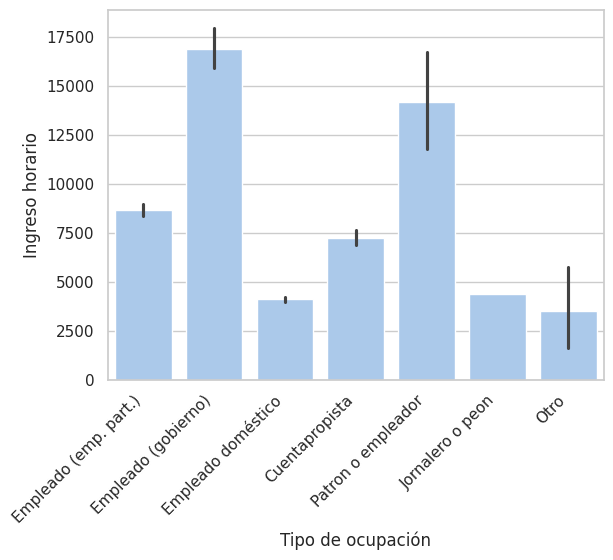

In [25]:
# Creo el barplot
ax = sns.barplot(data=geih_subset, x="relab", y="y_total_m_ha", weights="fex_c", errorbar=("ci", 95))

# Setteo axis labels
ax.set_xlabel("Tipo de ocupación")
ax.set_ylabel("Ingreso horario")

# Defino diccionario con las labels de relab
relab_labels = {
    1.0: "Empleado (emp. part.)",  # Keys are now floats
    2.0: "Empleado (gobierno)",
    3.0: "Empleado doméstico",
    4.0: "Cuentapropista",
    5.0: "Patron o empleador",
    6.0: "Trabajador familiar sin remuneracion",
    7.0: "Trabajador sin remuneracin en emp.",
    8.0: "Jornalero o peon",
    9.0: "Otro"
}

tick_positions = ax.get_xticks()

# Obtengo las labels en números
current_labels = [float(label.get_text()) for label in ax.get_xticklabels()]

# Las reemplazo por el diccionario que creé
new_labels = [relab_labels.get(label, label) for label in current_labels]

ax.xaxis.set_major_locator(FixedLocator(tick_positions))
ax.xaxis.set_major_formatter(FixedFormatter(new_labels))

plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()